In [1]:
import sys
sys.path.append('../src')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from gait.config import pd
from gait.utils import get_data_by_overlap_percent, split_test_train_by_subjects
from gait.training import train_model
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

In [4]:
OVERLAP_PERCENT = 90
X, y, subjects = get_data_by_overlap_percent(OVERLAP_PERCENT)
print(X.shape)

(2451, 128, 9)


In [5]:
X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
    X, y, subjects, train_percent=0.9)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2033, 128, 9)
(2033, 3)
(418, 128, 9)
(418, 3)


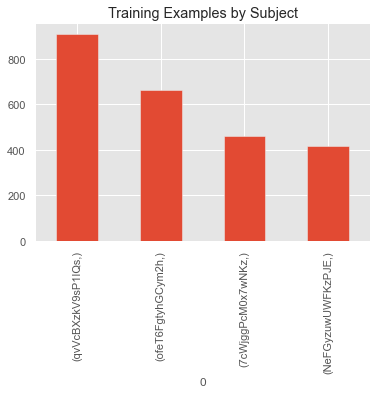

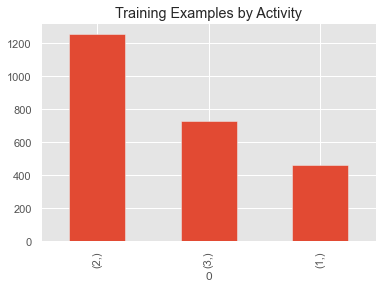

In [6]:
sns.set();
plt.style.use('ggplot')

subject_df = pd.DataFrame(subjects)
subject_df.value_counts().plot(kind='bar',
                                   title='Training Examples by Subject')
plt.show()
activity_df = pd.DataFrame(y)
activity_df.value_counts().plot(kind="bar", title="Training Examples by Activity")
plt.show();

In [7]:
model, history, evaluation_history = train_model(X_train, y_train, X_test, y_test, overlap_percent=OVERLAP_PERCENT, epochs=200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 9, 8)         656       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 3, 8)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 42, 3, 8)         32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 3, 32)         1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 3, 32)        0         
 2D)                                                             
                                                        

In [8]:
save_history(history, OVERLAP_PERCENT)
save_test_history(evaluation_history, OVERLAP_PERCENT)

Saved training details to /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../logs/log_90_overlap/history.csv
Saved validation details to /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../logs/log_90_overlap/evaluation.csv


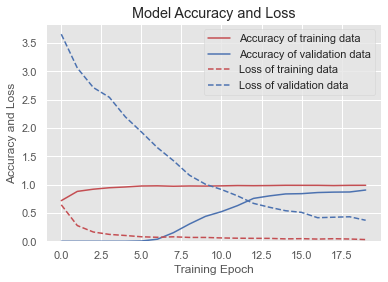

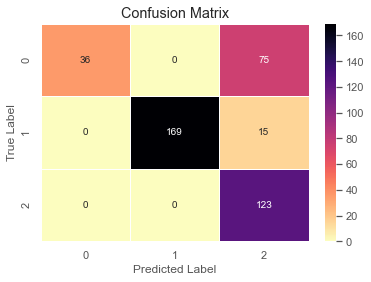

In [9]:
save_accuracy_loss_figure(history, OVERLAP_PERCENT)
validations, predictions = compute_validations_predictions(
    model, X_test, y_test)
save_confusion_matrix_figure(validations, predictions, OVERLAP_PERCENT, sns)


In [10]:
# from sklearn import metrics
# from sklearn.metrics import classification_report
# import numpy as np

In [11]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

# # Print confusion matrix for training data
# y_pred_train = model.predict(X_train)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(max_y_pred_train.shape)
# print(y_train_non_encoded.shape)
# print(classification_report(y_train_non_encoded, max_y_pred_train))

In [12]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='magma_r',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# y_pred_test = model.predict(X_test)
# # Take the class with the highest probability from the test predictions
# max_y_pred_test = np.argmax(y_pred_test, axis=1)
# max_y_test = np.argmax(y_test, axis=1)

# show_confusion_matrix(max_y_test, max_y_pred_test)

# print(classification_report(max_y_test, max_y_pred_test))